# Unsupervised Learning : 

No labels are given to the learning algorithm, leaving it on its own to find structure in its input. Unsupervised learning can be a goal in itself (discovering hidden patterns in data) or a means towards an end (feature learning).

In some pattern recognition problems, the training data consists of a set of input vectors x without any corresponding target values. The goal in such unsupervised learning problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine how the data is distributed in the space, known as density estimation. To put forward in simpler terms, for a n-sampled space x1 to xn, true class labels are not provided for each sample, hence known as learning without teacher.

## What is Clustering?
Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data. A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”. A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

##### The goal of clustering is to determine the internal grouping in a set of unlabeled data

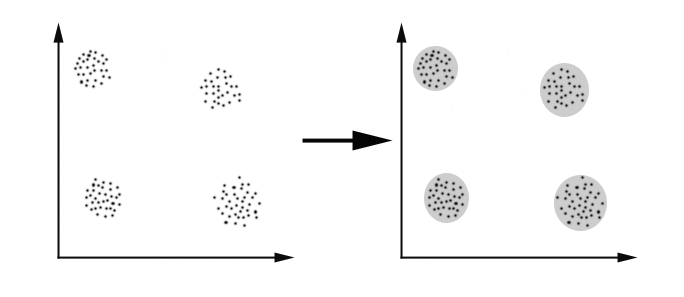

#### Proximity Measures

For clustering, we need to define a proximity measure for two data points. Proximity here means how similar/dissimilar the samples are with respect to each other.

* Similarity measure S(xi,xk): large if xi,xk are similar
* Dissimilarity(or distance) measure D(xi,xk): small if xi,xk are similar

### Clustering Algorithms

Clustering algorithms may be classified as listed below:
* Exclusive Clustering : K-Means
* Overlapping Clustering : Fuzzy K-means
* Hierarchical Clustering 
* Probabilistic Clustering : Mixture of Gaussians

In the first case data are grouped in an exclusive way, so that if a certain data point belongs to a definite cluster then it could not be included in another cluster. A simple example of that is shown in the figure below, where the separation of points is achieved by a straight line on a bi-dimensional plane.

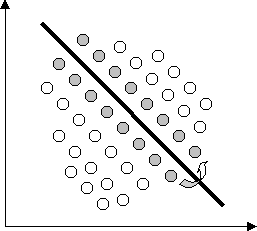

On the contrary, the second type, the overlapping clustering, uses fuzzy sets to cluster data, so that each point may belong to two or more clusters with different degrees of membership. In this case, data will be associated to an appropriate membership value.

A hierarchical clustering algorithm is based on the union between the two nearest clusters. The beginning condition is realized by setting every data point as a cluster. After a few iterations it reaches the final clusters wanted.

Finally, the last kind of clustering uses a completely probabilistic approach.

### K-Means Clustering

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

#### How does the K-Means Algorithm Work?
The working of the K-Means algorithm is explained in the below steps:

Step-1: Select the number K to decide the number of clusters.

Step-2: Select random K points or centroids. (It can be other from the input dataset).

Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters.

Step-4: Calculate the variance and place a new centroid of each cluster.

Step-5: Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to FINISH.

Step-7: The model is ready.

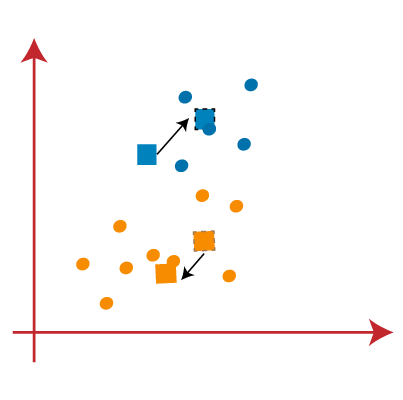

#### How to choose the value of "K number of clusters" in K-means Clustering?

#### Elbow Method
The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. The formula to calculate the value of WCSS (for 3 clusters) is given below:

##### WCSS= ∑Pi in Cluster1 distance(Pi C1)2 +∑Pi in Cluster2distance(Pi C2)2+∑Pi in CLuster3 distance(Pi C3)2
In the above formula of WCSS,

∑Pi in Cluster1 distance(Pi C1)2: It is the sum of the square of the distances between each data point and its centroid within a cluster1 and the same for the other two terms.

To measure the distance between data points and centroid, we can use any method such as Euclidean distance or Manhattan distance.

To find the optimal value of clusters, the elbow method follows the below steps:

* It executes the K-means clustering on a given dataset for different K values (ranges from 1-10).
* For each value of K, calculates the WCSS value.
* Plots a curve between calculated WCSS values and the number of clusters K.
* The sharp point of bend or a point of the plot looks like an arm, then that point is considered as the best value of K.

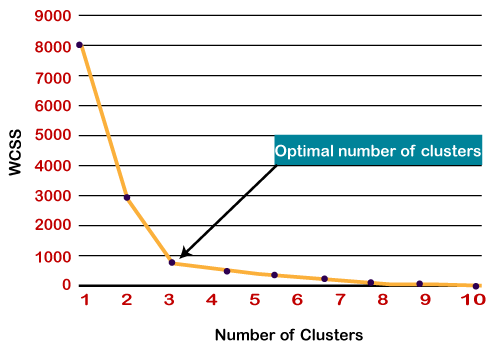

The steps to be followed for the implementation are given below:

1) Data Pre-processing

2) Finding the optimal number of clusters using the elbow method

3) Training the K-means algorithm on the training dataset

4) Visualizing the clusters

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [2]:

scaler = MinMaxScaler()

scaler.fit(df[['Salary']])
df['Salary'] = scaler.transform(df[['Salary']])

scaler.fit(df[['YearsExperience']])
df['YearsExperience'] = scaler.transform(df[['YearsExperience']])

NameError: name 'df' is not defined

In [ ]:

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [3]:
df = pd.read_csv("Heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X=df.iloc[:,[0,4]].values

In [5]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

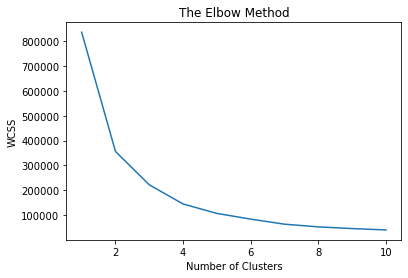

In [6]:

from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[2 2 0 2 1 0 1 2 0 0 2 2 2 0 2 0 1 2 2 2 2 2 0 2 0 1 0 0 1 0 0 0 0 2 0 0 1
 2 2 1 1 2 0 2 1 1 2 2 0 2 2 1 2 0 2 0 0 2 0 1 2 1 0 0 0 0 0 2 0 0 2 2 0 2
 0 2 2 0 0 2 2 1 1 1 2 1 2 0 0 2 2 0 0 2 0 0 1 2 1 2 2 2 0 2 0 0 2 2 2 2 1
 0 1 0 2 0 0 0 0 2 1 2 2 2 0 0 0 2 0 2 0 2 1 2 1 2 0 0 0 2 1 1 0 0 0 2 2 2
 0 0 2 0 2 2 0 0 2 0 0 0 2 1 0 0 0 2 2 2 2 0 2 2 2 0 0 0 2 1 0 2 1 0 1 2 2
 2 2 2 2 0 1 0 0 2 0 1 2 2 2 2 0 2 2 2 0 2 2 2 0 0 2 2 0 1 2 1 2 1 2 2 1 0
 2 2 2 0 2 0 2 1 2 2 2 2 1 1 1 1 1 2 2 2 0 2 0 2 1 2 2 2 1 2 1 1 2 1 2 0 2
 2 2 2 2 2 0 0 1 0 2 2 2 2 2 2 2 0 0 2 1 0 1 0 0 0 0 1 0 2 1 0 0 1 0 0 0 0
 0 0 2 2 0 0 2]


For n_clusters = 2 The average silhouette_score is : 0.5272399836976794
For n_clusters = 3 The average silhouette_score is : 0.46966086316922767
For n_clusters = 4 The average silhouette_score is : 0.47642262183861334
For n_clusters = 5 The average silhouette_score is : 0.438216438042612
For n_clusters = 6 The average silhouette_score is : 0.41911789566591423
For n_clusters = 7 The average silhouette_score is : 0.4200961499208235


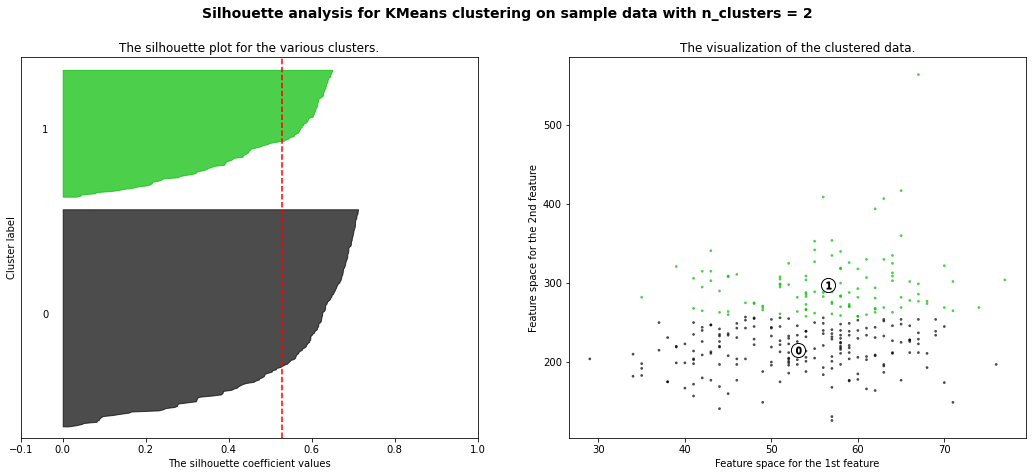

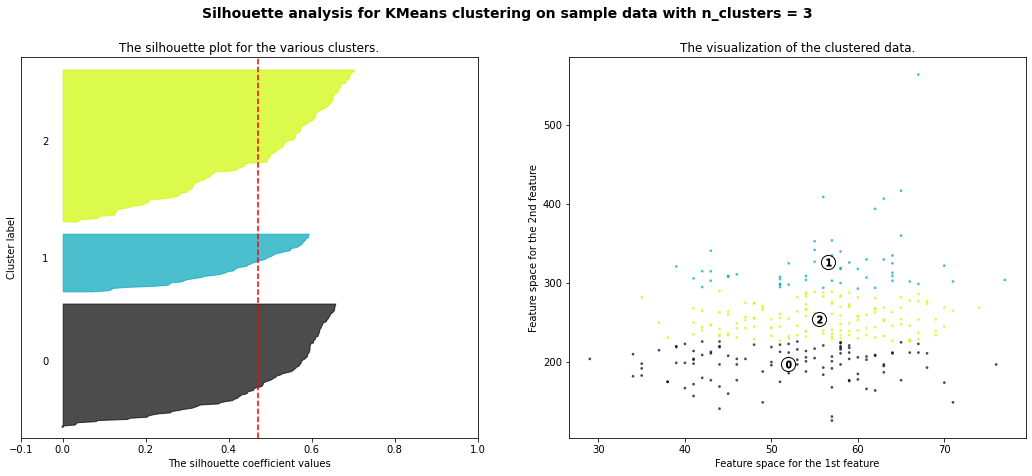

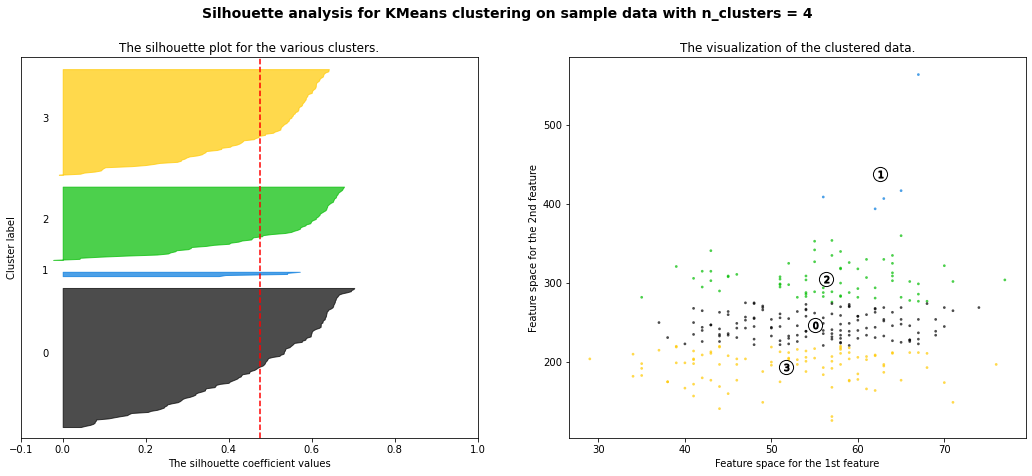

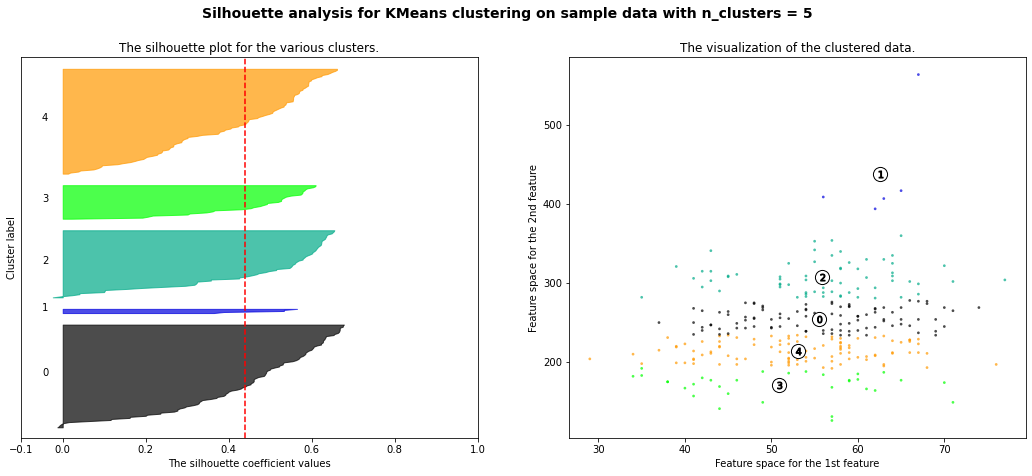

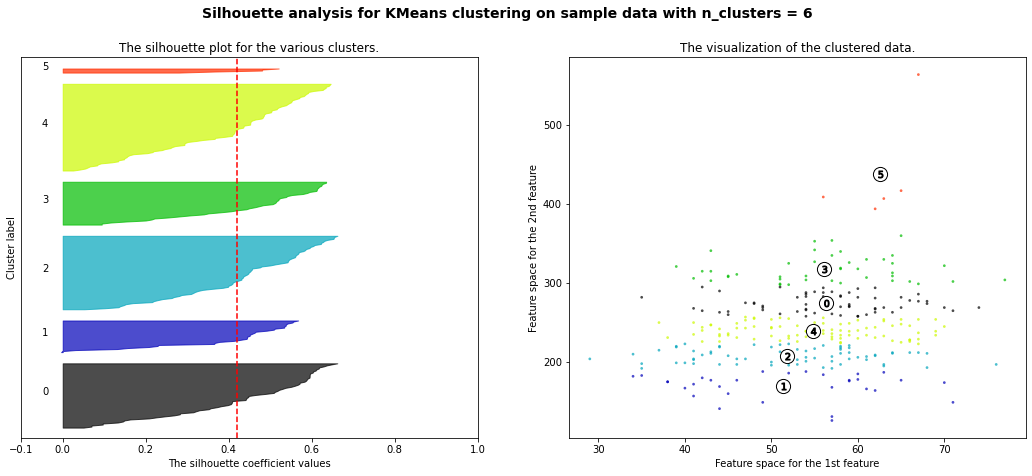

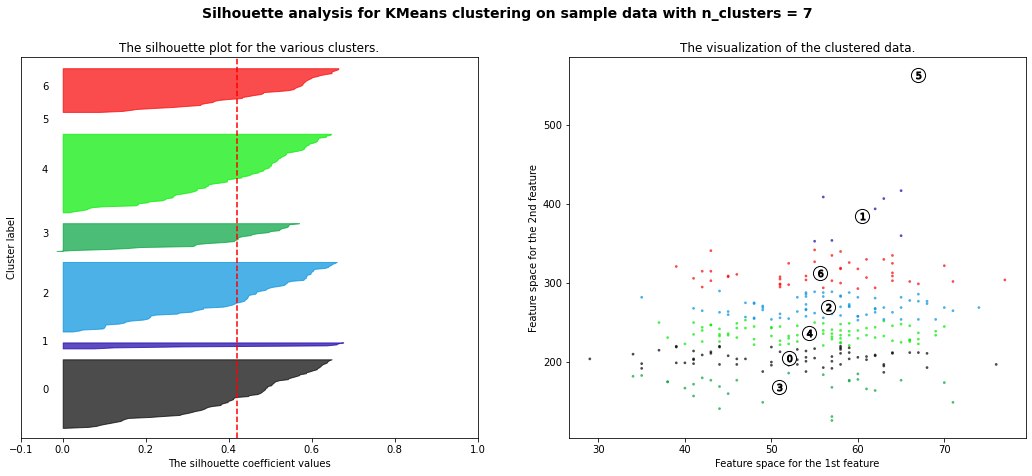

In [8]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
